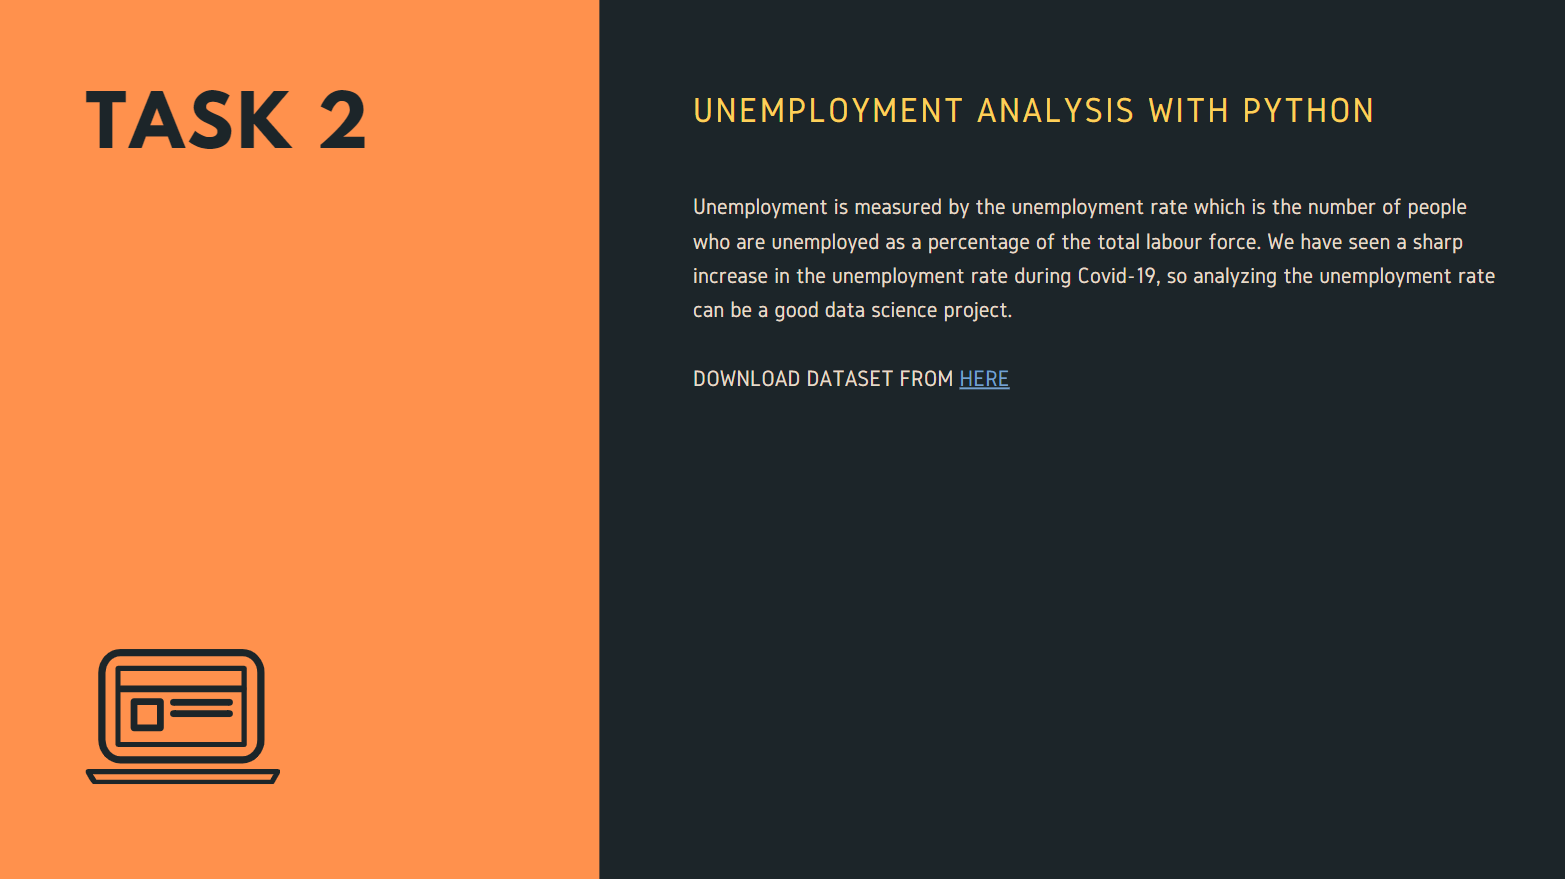

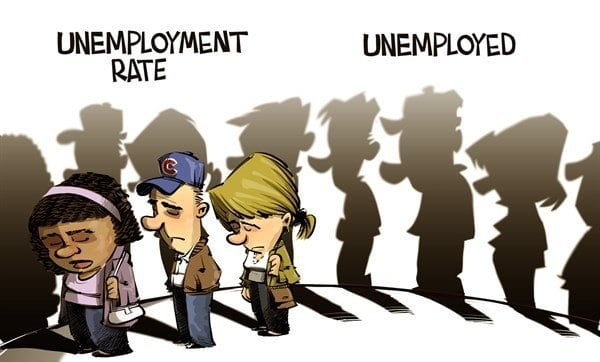

## Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import plotly.express as px

In [11]:
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [55]:
df = pd.read_csv('Unemployment in India.csv')
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
df.size

2403

In [7]:
df.shape

(267, 9)

In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [12]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [3]:
print(df.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [10]:
df.duplicated().sum()

0

## Data Pre-processing 

In [13]:
df.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate (%),-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


We are required to rename columns because we may get errors while using previous columns due to the unwanted spaces in naming. Hence the dataframe columns have to be re-formatted properly.

In [16]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [17]:
df.rename(columns={' Date':'Date',
                         ' Frequency':'Frequency',
                         ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                        ' Estimated Employed':'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [18]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

Now we can clearly find the difference in the columns naming of the dataframe which is fair and good for our further visulaization and analysis.

In [20]:
df.duplicated().sum()

0

In [24]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object

In [25]:
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month_name()
df['year']=df['Date'].dt.year

In [26]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,31,January,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,29,February,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,31,March,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,30,April,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,31,May,2020


In [27]:
df['Region'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

## Exploratory Data Analysis,Data Visualization & Plotting

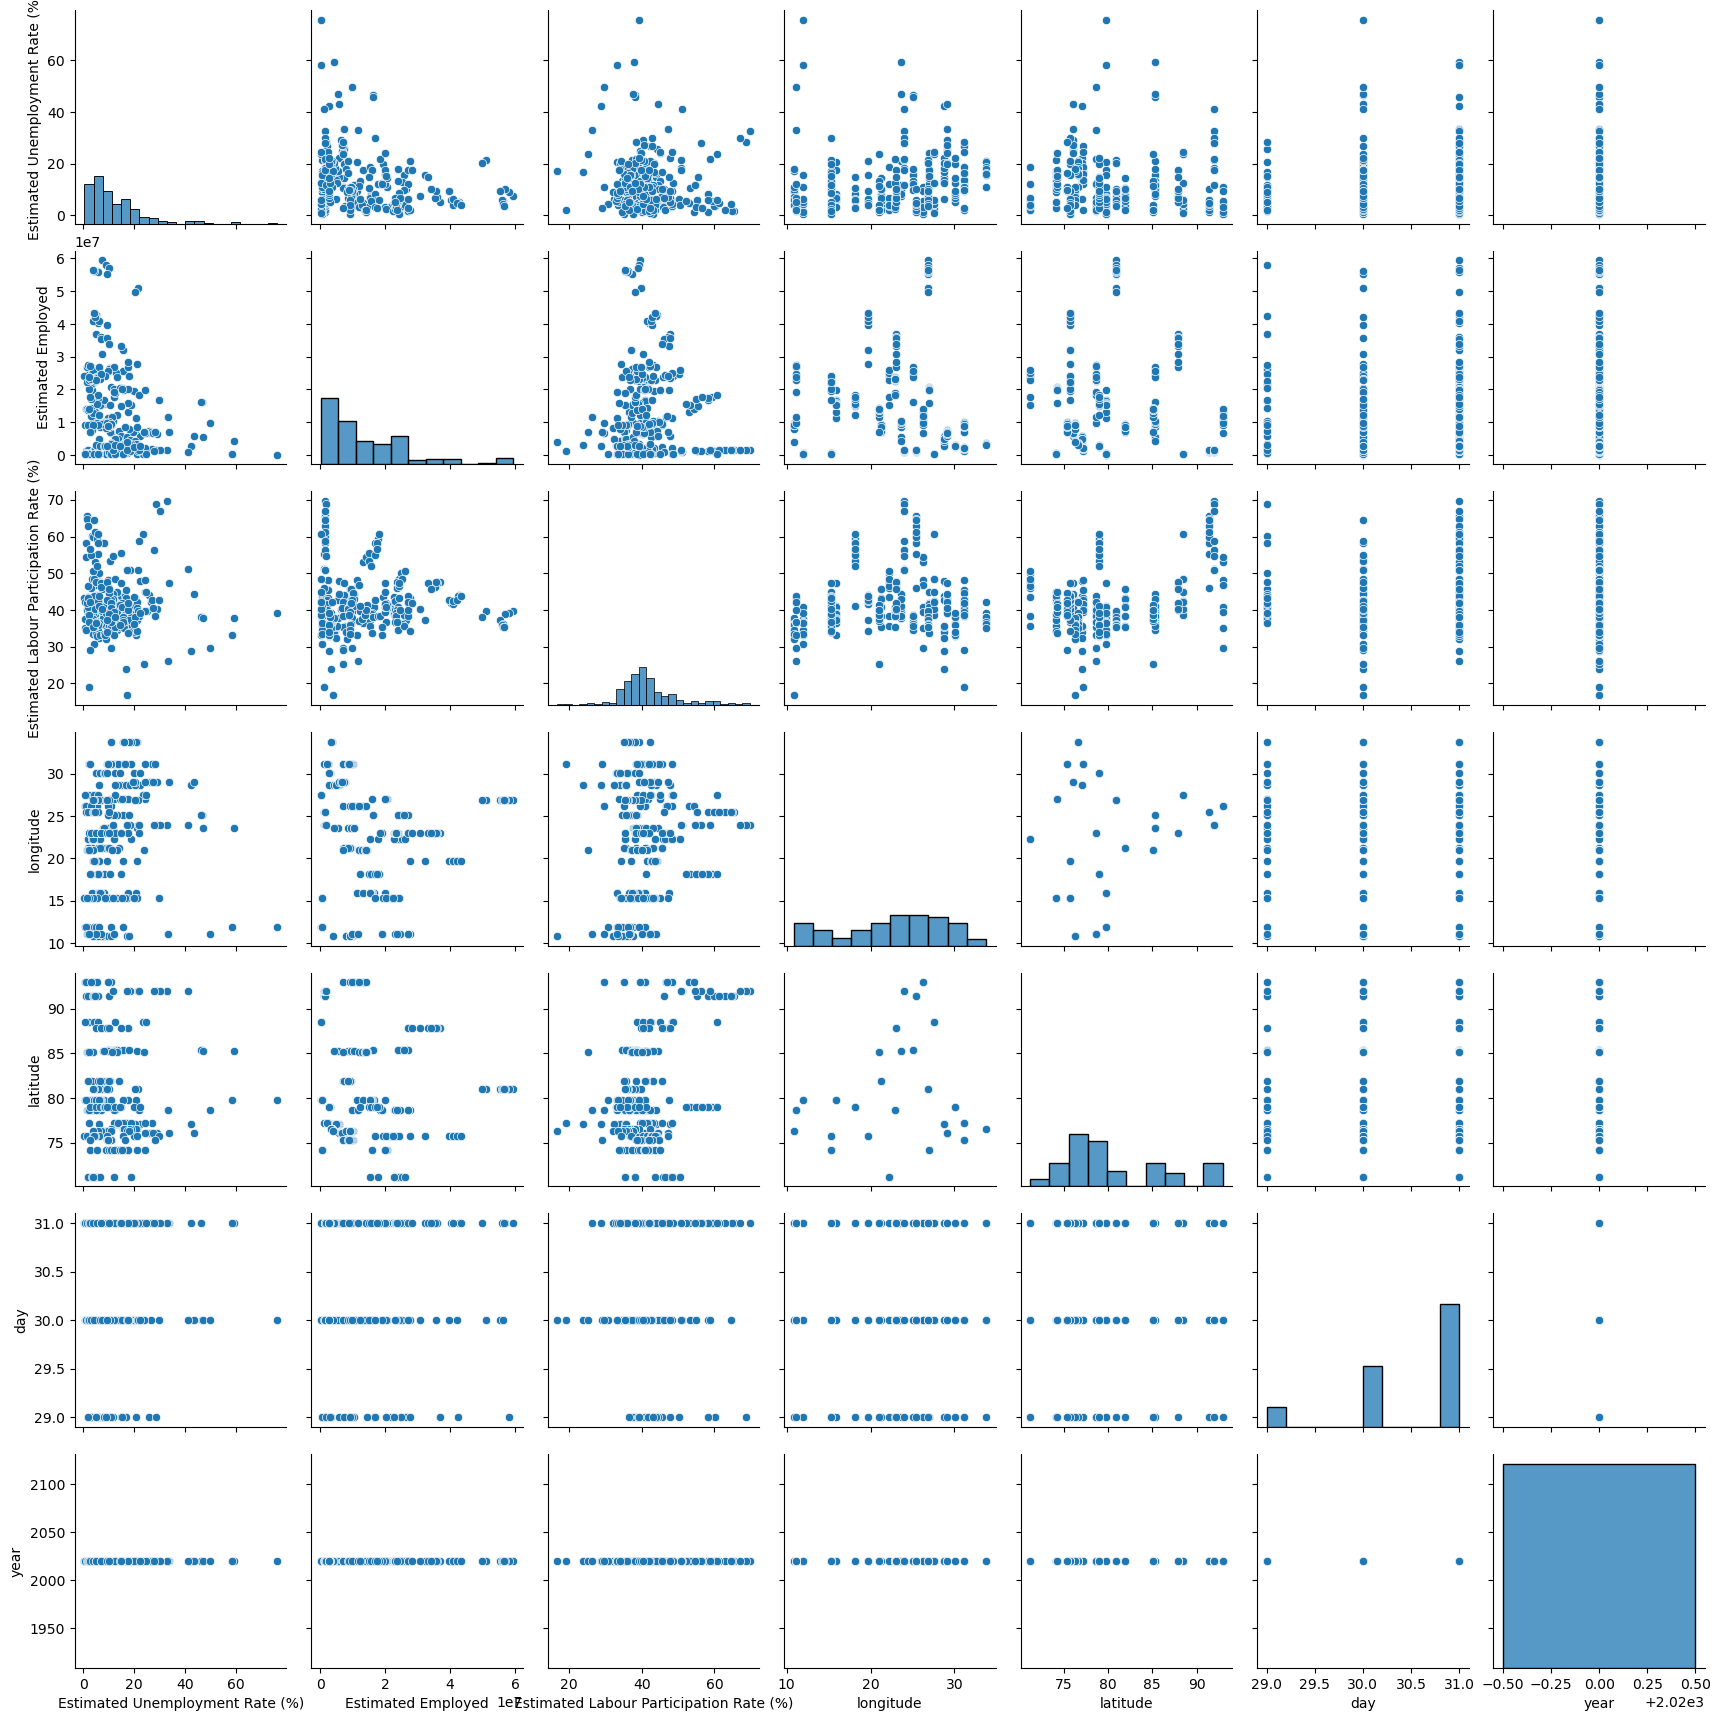

In [48]:
sns.pairplot(df)

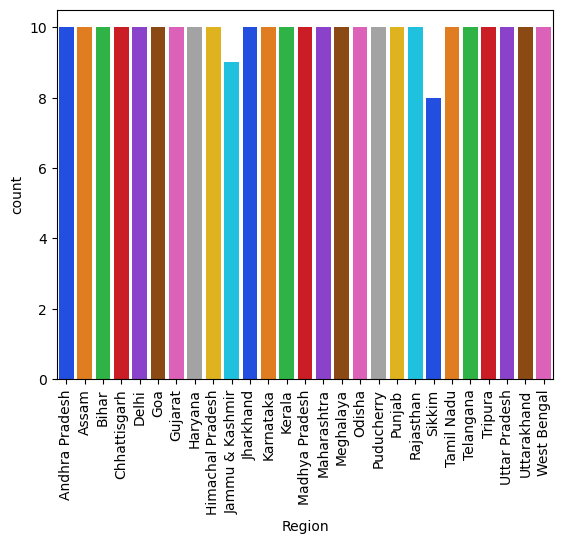

In [33]:
sns.countplot(x=df['Region'],palette = "bright")
plt.xticks(rotation='vertical')
plt.show()

<BarContainer object of 267 artists>

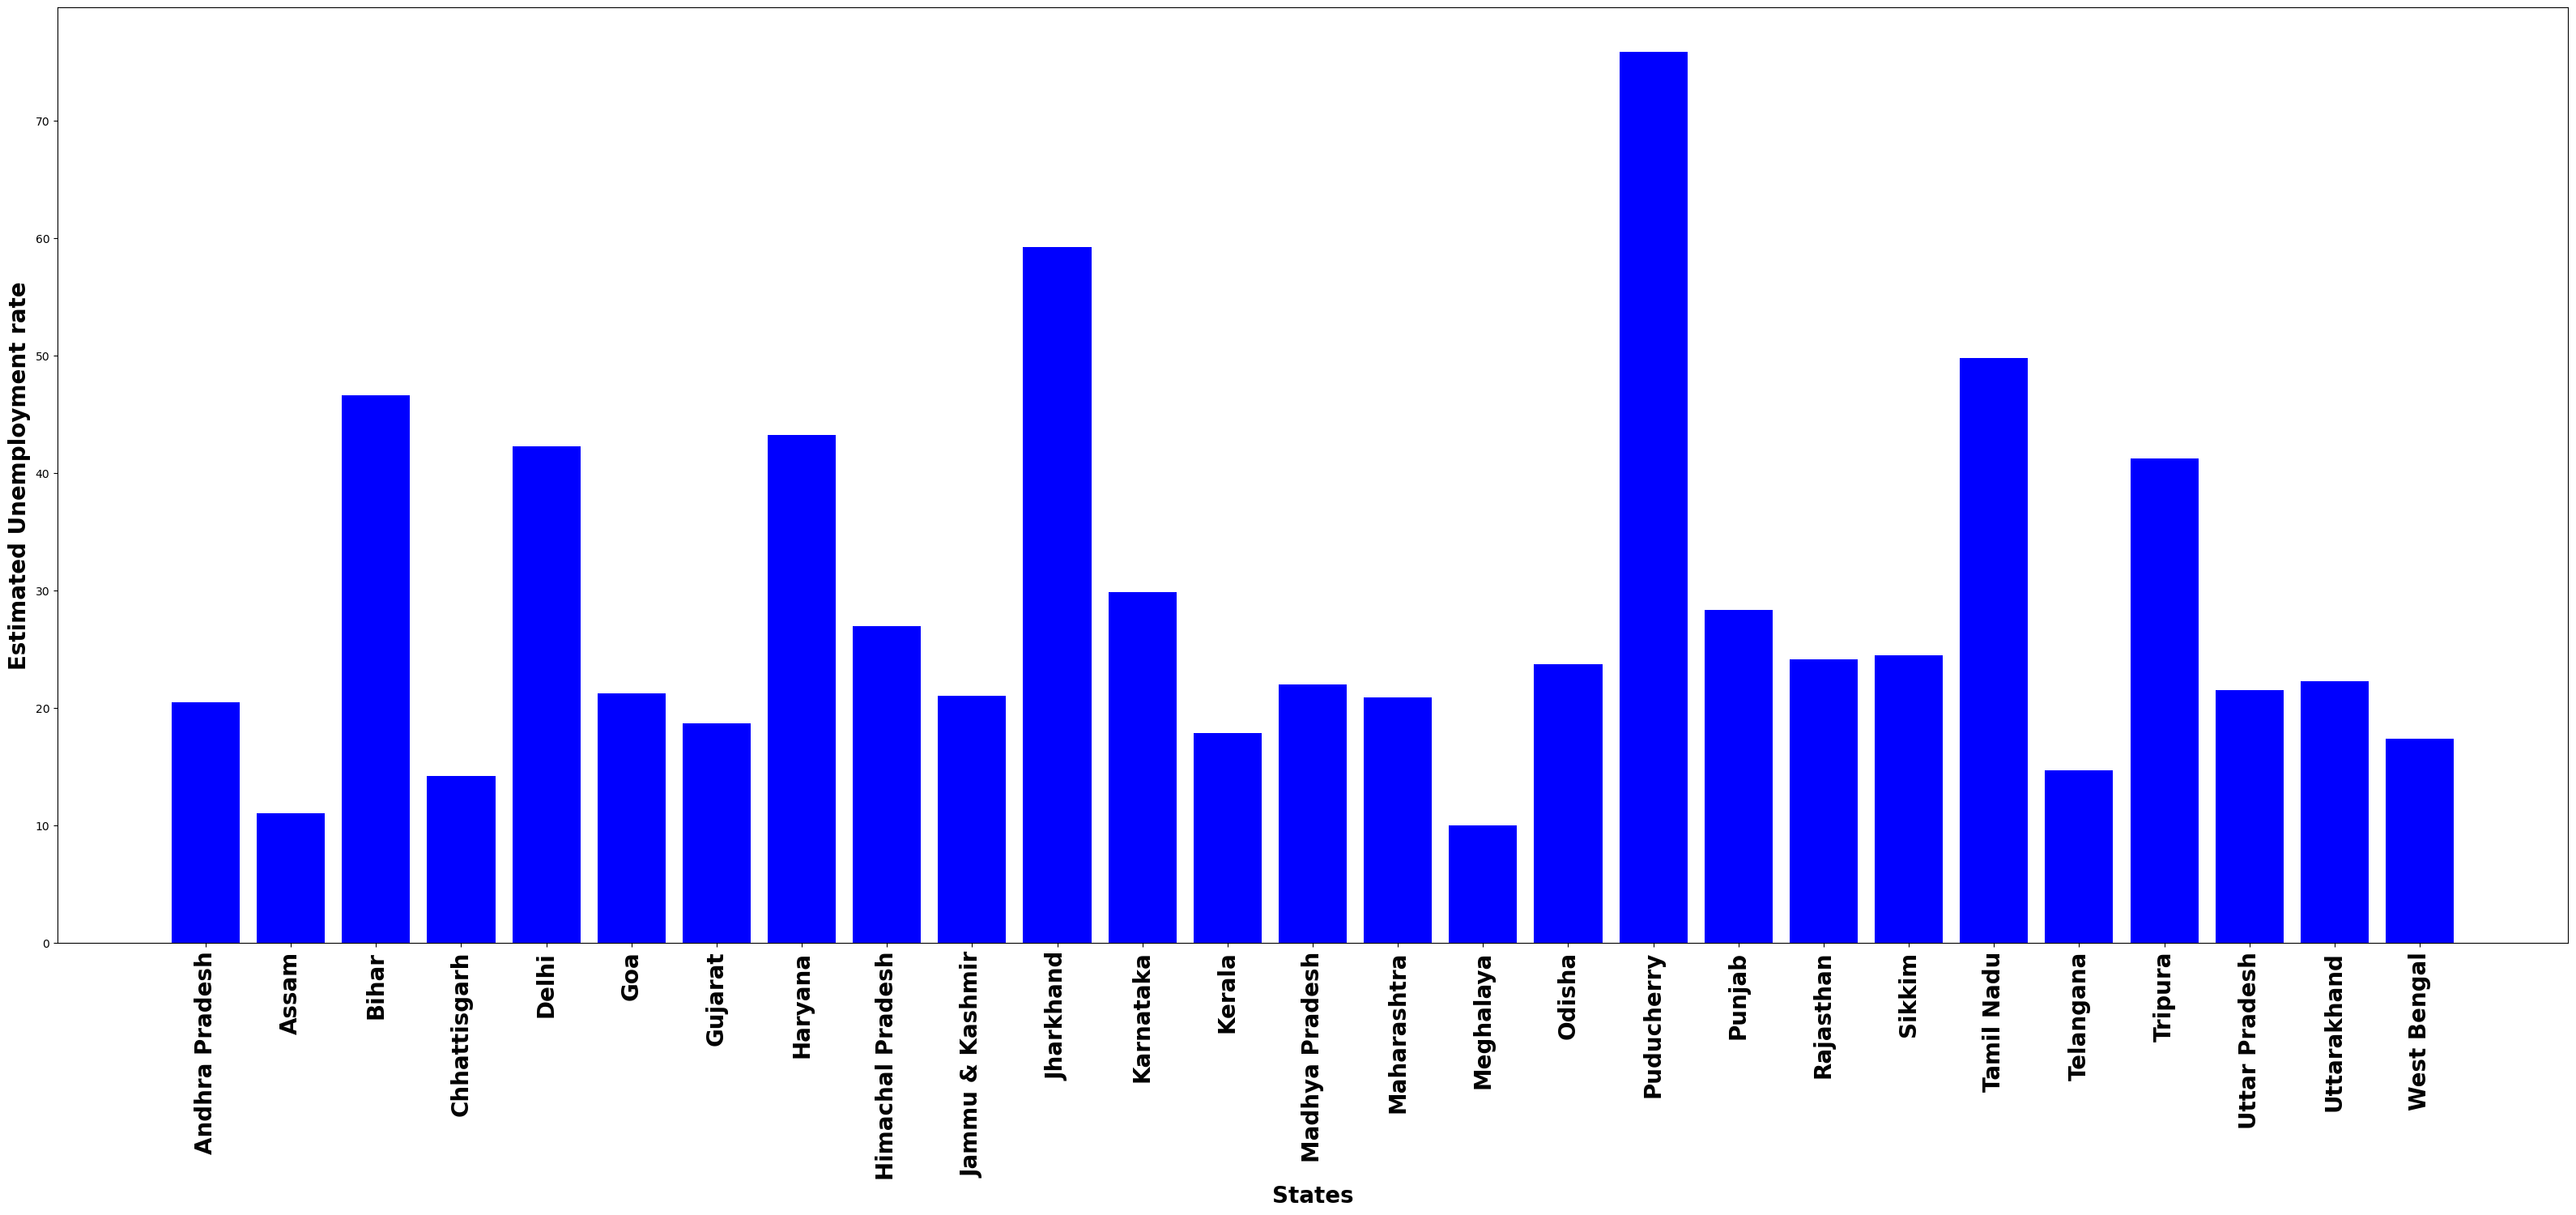

In [37]:
df=pd.DataFrame(df)
y=df['Estimated Unemployment Rate (%)']
x=df['Region']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("States",fontweight='bold',fontsize=20)
plt.ylabel("Estimated Unemployment rate",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold',rotation='vertical',fontsize=20)
plt.bar(x,y, color='b',align='center')

In [38]:
df2= df[['Region','Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(by='Estimated Unemployment Rate (%)', ascending =False)
df2

,Estimated Unemployment Rate (%)
Region,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


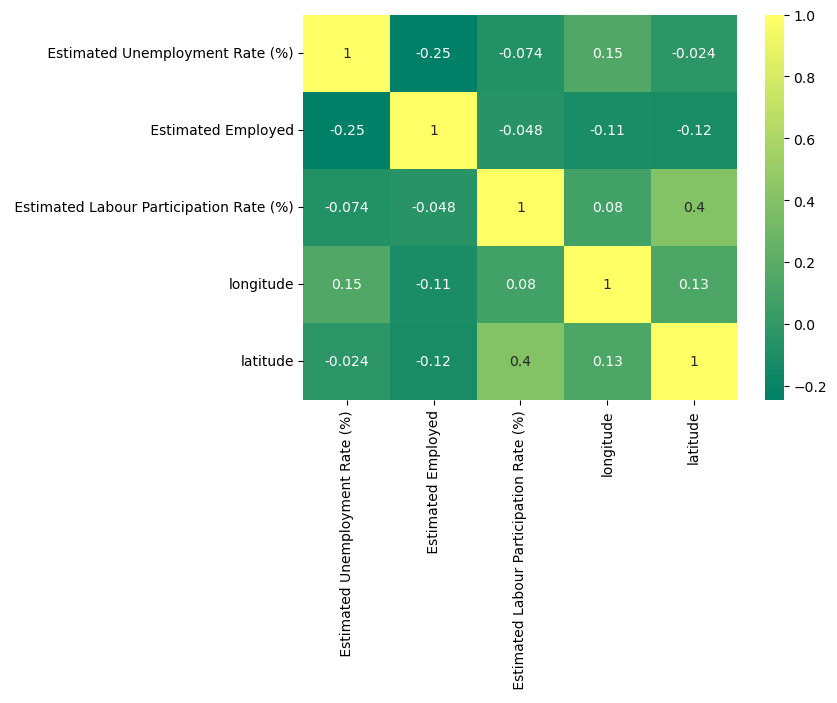

In [56]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap='summer')
plt.show()

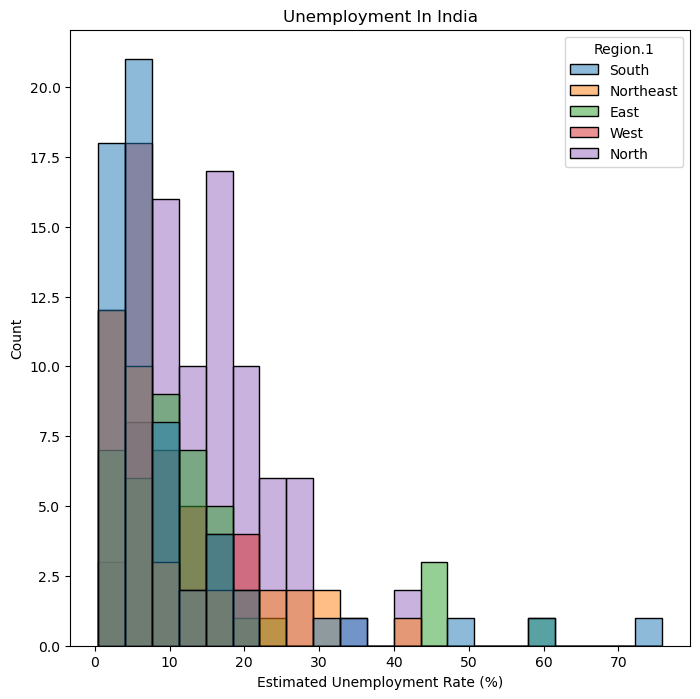

In [44]:
plt.figure(figsize=(8,8))
plt.title('Unemployment In India')
sns.histplot(x='Estimated Unemployment Rate (%)', hue="Region.1", data=df)
plt.show()

<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='Estimated Labour Participation Rate (%)'>

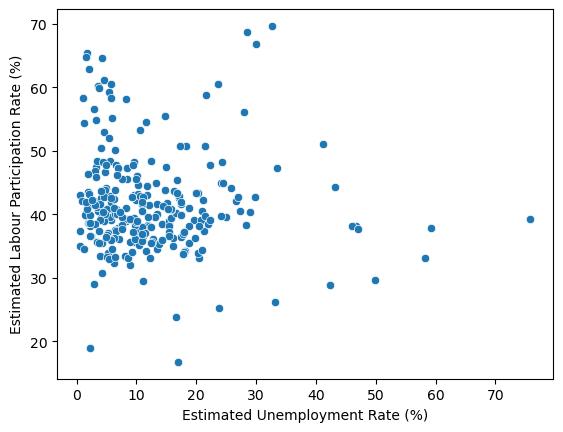

In [47]:
sns.scatterplot(data=df, x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)')

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64


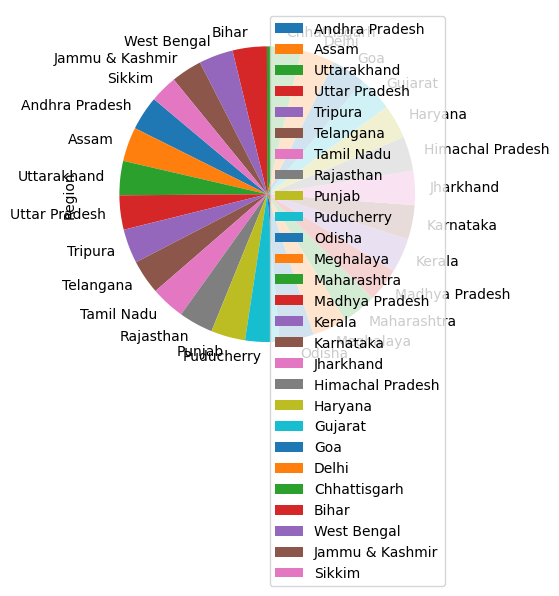

In [57]:
freq = df['Region'].value_counts()
print(freq)
freq.plot(kind='pie',startangle = 140)
plt.legend()
plt.show()

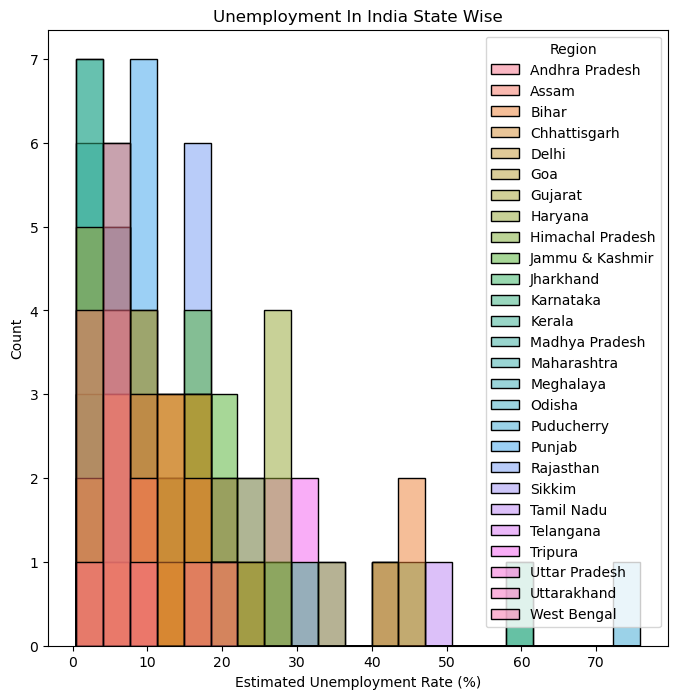

In [46]:
plt.figure(figsize=(8,8))
plt.title('Unemployment In India State Wise')
sns.histplot(x='Estimated Unemployment Rate (%)', hue="Region", data=df)
plt.show()